In [89]:
import pandas as pd
import csv 
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [17]:
confirmed = pd.read_csv('time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('time_series_19-covid-Deaths.csv')
recovered = pd.read_csv('time_series_19-covid-Recovered.csv')

In [18]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,986,987,988,989,989,989,989,989,989,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,393,395,396,399,399,399,400,400,410,410
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,560,567,572,573,575,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,293,294,294,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [19]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,4,4,4,4,4,4,5,7
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [20]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,413,474,539,597,637,663,712,744,792,821
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,145,153,169,178,189,198,215,235,248,257
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,274,299,316,328,335,349,372,384,401,422
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,112,126,149,162,170,183,199,218,228,235
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,65,71,76,76,78,80,80,81,81,82


In [96]:
conf = confirmed.iloc[:,4:].sum(axis=0).reset_index().rename(columns={"index":"ds", 0:"y"})
death = deaths.iloc[:,4:].sum(axis=0).reset_index().rename(columns={"index":"ds", 0:"y"})
rec = recovered.iloc[:,4:].sum(axis=0).reset_index().rename(columns={"index":"ds", 0:"y"})

In [22]:
conf.head()

,ds,y
0,1/22/20,555
1,1/23/20,653
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [23]:
death.head()

,ds,y
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56


In [24]:
rec.head()

,ds,y
0,1/22/20,28
1,1/23/20,30
2,1/24/20,36
3,1/25/20,39
4,1/26/20,52


In [65]:
c = Prophet(daily_seasonality=True)
c.fit(conf)
d = Prophet(daily_seasonality=True)
d.fit(death)
r = Prophet(daily_seasonality=True)
r.fit(rec)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [51]:
# Predictions for a week from now
c_future = c.make_future_dataframe(periods=7)
d_future = d.make_future_dataframe(periods=7)
r_future = r.make_future_dataframe(periods=7)

In [52]:
c_forecast = c.predict(c_future)
d_forecast = d.predict(d_future)
r_forecast = r.predict(r_future)

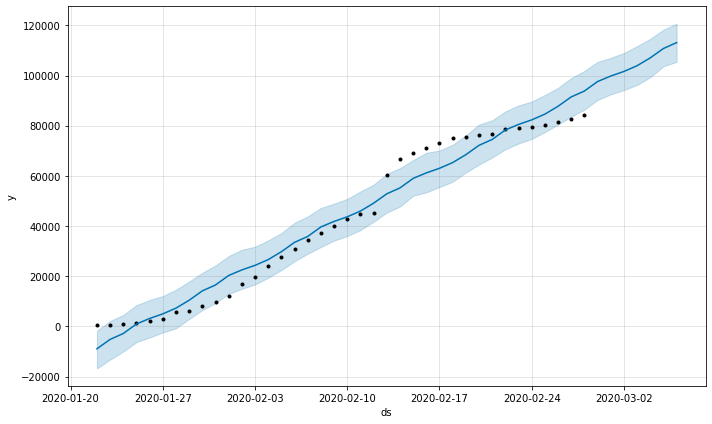

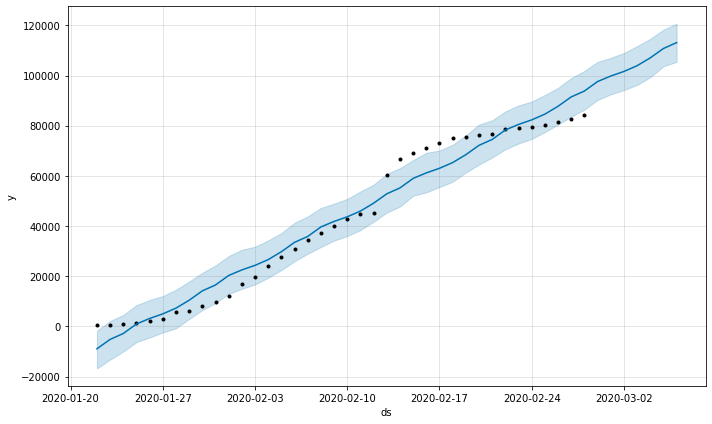

In [91]:
# Forecast only next week
c_forecast.tail(7)
c.plot(c_forecast)

In [54]:
d_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
38,2020-02-29,3038.750265,3000.273229,3079.853342
39,2020-03-01,3115.567688,3072.302794,3155.962052
40,2020-03-02,3216.985110,3171.409011,3261.880170
41,2020-03-03,3305.047383,3253.914374,3360.152131
42,2020-03-04,3366.745045,3306.236731,3427.971681
43,2020-03-05,3467.392236,3395.207368,3539.281361
44,2020-03-06,3540.680164,3454.036399,3632.354606


In [55]:
r_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
38,2020-02-29,37492.870192,36973.695251,38023.184282
39,2020-03-01,39333.620993,38820.487643,39894.957782
40,2020-03-02,41495.571773,40915.350646,42160.311075
41,2020-03-03,43866.576957,43136.042631,44531.977276
42,2020-03-04,46190.887580,45367.307264,47081.489402
43,2020-03-05,48547.757214,47420.354871,49613.028525
44,2020-03-06,50712.245686,49465.733431,52032.902847


In [95]:
cv = cross_validation(c, initial='25 days', horizon='2 days')
perf = performance_metrics(cv)
# fig = plot_cross_validation_metric(cv, metric='mape')
perf


INFO:fbprophet:Making 11 forecasts with cutoffs between 2020-02-16 00:00:00 and 2020-02-26 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,7.688685e+07,8768.514482,8210.364041,0.104593,0.109735,0.090909
1,2 days,1.176803e+08,10848.054093,10492.869415,0.132093,0.136524,0.090909
